In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use('seaborn-white')
# colorblind safe
plt.style.use('seaborn-colorblind')
plt.style.use('tableau-colorblind10')

# width and precision for f strings
width = 10
precision = 4

# default sizes for plots
# https://matplotlib.org/3.3.0/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 2

# other settings
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option("display.precision", 3)
np.set_printoptions(precision=3, suppress=True)
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)
%config IPCompleter.greedy=True

In [2]:
# setup dir
import sys, os
sys.path.insert(0, os.path.abspath('/Users/pault/Desktop/github/CampsitePredict/src'))

In [3]:
import helper_funcs as my_funcs

In [4]:
data = pd.read_json('../data/data.zip')

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter

In [6]:
data_nlp = data[['object_id', 'description']]

In [7]:
data_nlp.head()

,object_id,description
0,527017,"<p><a href=""http://s432.photobucket.com/albums..."
1,786878,"<p>Join us for a quick, one-night, community-b..."
2,787337,"<h3><span class=""subcategory""><strong>Teacher ..."
3,885645,"<p style=""margin-bottom: 1.3em; padding-bottom..."
4,1114349,<p>Writers and filmmakers need to understand t...


In [25]:
data_nlp.set_index(data_nlp['object_id'], inplace=True)

In [26]:
data_nlp.drop('object_id', axis=1, inplace=True)

/usr/local/anaconda3/envs/py377/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
data_nlp.head()

,description
object_id,
527017,"<p><a href=""http://s432.photobucket.com/albums..."
786878,"<p>Join us for a quick, one-night, community-b..."
787337,"<h3><span class=""subcategory""><strong>Teacher ..."
885645,"<p style=""margin-bottom: 1.3em; padding-bottom..."
1114349,<p>Writers and filmmakers need to understand t...


In [8]:
data_nlp.loc[:,'description'][0]

'<p><a href="http://s432.photobucket.com/albums/qq49/digusonline/?action=view&amp;current=supersunday.jpg" target="_blank"><img src="http://i432.photobucket.com/albums/qq49/digusonline/supersunday.jpg" border="0" alt="Photobucket" /></a></p>\r\n<p>\xa0</p>\r\n<p style="text-align: center;"><font size="3"><strong>Party Starz Entertaintment &amp; Diverse International Group Presents...<br /></strong></font><br /><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>The Official\xa0"99 Hour No Sleep" Super Bowl </strong></font></p>\r\n<p style="text-align: center;"><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Weekend </strong></font><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Grand Finale</strong></font></p>\r\n<p><br /><span style="font-family: Times New Roman,serif;"><font size="3"><font face="tahoma,arial,helvetica,sans-serif">No matter who wins or loses, this post-game party cannot be missed! Enjoy the drink specials and all night music

In [9]:
from bs4 import BeautifulSoup

In [28]:
descriptions = data_nlp['description']

In [29]:
descriptions.head()

object_id
527017     <p><a href="http://s432.photobucket.com/albums...
786878     <p>Join us for a quick, one-night, community-b...
787337     <h3><span class="subcategory"><strong>Teacher ...
885645     <p style="margin-bottom: 1.3em; padding-bottom...
1114349    <p>Writers and filmmakers need to understand t...
Name: description, dtype: object

In [13]:
soup = BeautifulSoup(descriptions[0], 'html.parser')

In [20]:
print(soup.prettify())

<p>
 <a href="http://s432.photobucket.com/albums/qq49/digusonline/?action=view&amp;current=supersunday.jpg" target="_blank">
  <img alt="Photobucket" border="0" src="http://i432.photobucket.com/albums/qq49/digusonline/supersunday.jpg"/>
 </a>
</p>
<p>
</p>
<p style="text-align: center;">
 <font size="3">
  <strong>
   Party Starz Entertaintment &amp; Diverse International Group Presents...
   <br/>
  </strong>
 </font>
 <br/>
 <font face="tahoma,arial,helvetica,sans-serif" size="4">
  <strong>
   The Official "99 Hour No Sleep" Super Bowl
  </strong>
 </font>
</p>
<p style="text-align: center;">
 <font face="tahoma,arial,helvetica,sans-serif" size="4">
  <strong>
   Weekend
  </strong>
 </font>
 <font face="tahoma,arial,helvetica,sans-serif" size="4">
  <strong>
   Grand Finale
  </strong>
 </font>
</p>
<p>
 <br/>
 <span style="font-family: Times New Roman,serif;">
  <font size="3">
   <font face="tahoma,arial,helvetica,sans-serif">
    No matter who wins or loses, this post-game party

In [17]:
from pprint import pprint
pprint(soup)

<p><a href="http://s432.photobucket.com/albums/qq49/digusonline/?action=view&amp;current=supersunday.jpg" target="_blank"><img alt="Photobucket" border="0" src="http://i432.photobucket.com/albums/qq49/digusonline/supersunday.jpg"/></a></p>
<p> </p>
<p style="text-align: center;"><font size="3"><strong>Party Starz Entertaintment &amp; Diverse International Group Presents...<br/></strong></font><br/><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>The Official "99 Hour No Sleep" Super Bowl </strong></font></p>
<p style="text-align: center;"><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Weekend </strong></font><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Grand Finale</strong></font></p>
<p><br/><span style="font-family: Times New Roman,serif;"><font size="3"><font face="tahoma,arial,helvetica,sans-serif">No matter who wins or loses, this post-game party cannot be missed! Enjoy the drink specials and all night music!<strong> </strong></fo

In [ ]:
pd.read_html(descriptions[0])

In [21]:
soup.get_text()

'\n\xa0\nParty Starz Entertaintment & Diverse International Group Presents...The Official\xa0"99 Hour No Sleep" Super Bowl \nWeekend Grand Finale\nNo matter who wins or loses, this post-game party cannot be missed! Enjoy the drink specials and all night music!\xa0The ultimate "99 No Sleep"\xa0Super Bowl Weekend Grand Finale! Sunday, February 7th, 2010 @ Ink Nightclub-South Beach (717 Washington Ave, Miami Bch, FL 33139).\nHosted by 99 Jamz with special appearances by Fast Life Youngstaz. Special invited guests: Billy Blue, Dorrough and Brisco and with performances by various artist\'s and many many more at South Beach\xa0Miami\'s finest venue! This is a party you have to see to believe! This is everyone\'s last chance to make that impression, so don\'t\xa0half-step, bring your "A" game\xa0and party with\xa0all of the hottest artists, celebrities, models and superstar athletes that are guaranteed to be in the building!\nDJ Q & DJ Slym will ber keepig the party jumping til the sun comes 

In [18]:
text = soup.find_all(text=True)

In [19]:
text

['\n',
 '\xa0',
 '\n',
 'Party Starz Entertaintment & Diverse International Group Presents...',
 'The Official\xa0"99 Hour No Sleep" Super Bowl ',
 '\n',
 'Weekend ',
 'Grand Finale',
 '\n',
 'No matter who wins or loses, this post-game party cannot be missed! Enjoy the drink specials and all night music!',
 '\xa0',
 'The ultimate "99 No Sleep"\xa0Super Bowl Weekend Grand Finale! Sunday, February 7th, 2010 @ Ink Nightclub-South Beach (717 Washington Ave, Miami Bch, FL 33139).',
 '\n',
 'Hosted by 99 Jamz with special appearances by Fast Life Youngstaz. Special invited guests: Billy Blue, Dorrough and Brisco and with performances by various artist\'s and many many more at South Beach\xa0Miami\'s finest venue! This is a party you have to see to believe! This is everyone\'s last chance to make that impression, so don\'t\xa0half-step, bring your "A" game\xa0and party with\xa0all of the hottest artists, celebrities, models and superstar athletes that are guaranteed to be in the building!',


In [ ]:
# now do for all rows?
soup = BeautifulSoup(descriptions[0], 'html.parser')

In [30]:
test = descriptions.head()

In [34]:
# iterate through each row and parse html # maybe better way to do this without iterating?
for index, row in test.items(): 
    print(row)

<p><a href="http://s432.photobucket.com/albums/qq49/digusonline/?action=view&amp;current=supersunday.jpg" target="_blank"><img src="http://i432.photobucket.com/albums/qq49/digusonline/supersunday.jpg" border="0" alt="Photobucket" /></a></p>
<p> </p>
<p style="text-align: center;"><font size="3"><strong>Party Starz Entertaintment &amp; Diverse International Group Presents...<br /></strong></font><br /><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>The Official "99 Hour No Sleep" Super Bowl </strong></font></p>
<p style="text-align: center;"><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Weekend </strong></font><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Grand Finale</strong></font></p>
<p><br /><span style="font-family: Times New Roman,serif;"><font size="3"><font face="tahoma,arial,helvetica,sans-serif">No matter who wins or loses, this post-game party cannot be missed! Enjoy the drink specials and all night music!<strong> </strong>

In [39]:
desc_dict = {}
for index, row in test.items(): 
#     print(row)
    soup = BeautifulSoup(row, 'html.parser')
    text = soup.get_text()
    desc_dict[index] = text

In [41]:
desc_dict[527017]

'\n\xa0\nParty Starz Entertaintment & Diverse International Group Presents...The Official\xa0"99 Hour No Sleep" Super Bowl \nWeekend Grand Finale\nNo matter who wins or loses, this post-game party cannot be missed! Enjoy the drink specials and all night music!\xa0The ultimate "99 No Sleep"\xa0Super Bowl Weekend Grand Finale! Sunday, February 7th, 2010 @ Ink Nightclub-South Beach (717 Washington Ave, Miami Bch, FL 33139).\nHosted by 99 Jamz with special appearances by Fast Life Youngstaz. Special invited guests: Billy Blue, Dorrough and Brisco and with performances by various artist\'s and many many more at South Beach\xa0Miami\'s finest venue! This is a party you have to see to believe! This is everyone\'s last chance to make that impression, so don\'t\xa0half-step, bring your "A" game\xa0and party with\xa0all of the hottest artists, celebrities, models and superstar athletes that are guaranteed to be in the building!\nDJ Q & DJ Slym will ber keepig the party jumping til the sun comes 

In [89]:
desc_dict

{527017: '\n\xa0\nParty Starz Entertaintment & Diverse International Group Presents...The Official\xa0"99 Hour No Sleep" Super Bowl \nWeekend Grand Finale\nNo matter who wins or loses, this post-game party cannot be missed! Enjoy the drink specials and all night music!\xa0The ultimate "99 No Sleep"\xa0Super Bowl Weekend Grand Finale! Sunday, February 7th, 2010 @ Ink Nightclub-South Beach (717 Washington Ave, Miami Bch, FL 33139).\nHosted by 99 Jamz with special appearances by Fast Life Youngstaz. Special invited guests: Billy Blue, Dorrough and Brisco and with performances by various artist\'s and many many more at South Beach\xa0Miami\'s finest venue! This is a party you have to see to believe! This is everyone\'s last chance to make that impression, so don\'t\xa0half-step, bring your "A" game\xa0and party with\xa0all of the hottest artists, celebrities, models and superstar athletes that are guaranteed to be in the building!\nDJ Q & DJ Slym will ber keepig the party jumping til the s

In [42]:
# do for full data
desc_dict = {}
for index, row in descriptions.items(): 
#     print(row)
    soup = BeautifulSoup(row, 'html.parser')
    text = soup.get_text()
    desc_dict[index] = text

In [43]:
len(desc_dict)

14337

In [73]:
X = pd.DataFrame.from_dict(desc_dict, orient='index')

In [52]:
X.head()

,0
527017,\n \nParty Starz Entertaintment & Diverse Inte...
786878,"Join us for a quick, one-night, community-buil..."
787337,Teacher Training on the Desired Results Develo...
885645,Affiliations are now due in respect of the 201...
1114349,Writers and filmmakers need to understand thei...


In [71]:
# recreate y with my descriptions
def convert(row):
    if row['acct_type'] == 'fraudster_event':
        val=True
    elif row['acct_type'] == 'fraudster':
        val=True
    elif row['acct_type'] == 'fraudster_att':
        val=True
    else:
        val=False
    return val
data['Fraud'] = data.apply(convert, axis=1)

In [72]:
y = data['Fraud']

In [63]:
# y = data['Fraud'].to_numpy()

In [66]:
# X = X.to_numpy()

In [74]:
# test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, stratify=y)

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10752 entries, 2919695 to 5358184
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10752 non-null  object
dtypes: object(1)
memory usage: 168.0+ KB


In [108]:
# now do NLP
tfidf = TfidfVectorizer(stop_words='english', max_features=10_000, max_df=0.9)
all_desc_tfidf_matrix = tfidf.fit_transform(X_train[0])
k = 15
clust_names = ['', '', '']
features = tfidf.get_feature_names()

In [109]:
def run_kmeans(X, df, features, k):
    '''
    accepts a TFIDF object (X), original df, features, and k (int)
    runs k means, gets top 20 cluster features, calcs % most common in each
    returns these as two dictionaries
    '''
    kmeans = KMeans(k)
    kmeans.fit(X)
    top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-21:-1]
    cluster_feats = {}
    for num, centroid in enumerate(top_centroids):
        cluster_feats[num] = ', '.join(features[i] for i in centroid)
    # get the cluster assigned to each row (site
    assigned_cluster = kmeans.fit_transform(X).argmin(axis=1)
    
    return cluster_feats, kmeans

    # save in dict
#     cluster_cats = {}

#     for i in range(kmeans.n_clusters):
#         cluster = np.arange(0, X.shape[0])[assigned_cluster == i]
#         categories = df.iloc[cluster]['Category']
#         most_common = Counter(categories).most_common()
#         cluster_cats[i] = {}
#         for j in range(len(most_common)):
#             cluster_cats[i].update({most_common[j][0]: most_common[j][1]})
#     return cluster_cats, cluster_feats

In [110]:
cluster_feats, km = run_kmeans(all_desc_tfidf_matrix, data, features, k)

In [111]:
cluster_feats

{0: 'reunion, darwin, recovery, crew, organisers, 80s, alexander, let, hotmail, year, memories, 11am, high, lake, helps, party, costs, 12, point, contact',
 1: 'com, www, http, facebook, tickets, https, dj, event, music, party, visit, org, night, youtube, ticket, dance, twitter, info, live, information',
 2: 'event, 00, business, tickets, new, 30, time, join, ticket, day, 10, class, course, come, learn, com, workshop, pm, 2013, registration',
 3: 'clubgolf, golf, child, camps, sign, scottish, offer, coaching, children, campers, quality, open, fun, asset, budding, golfer, receive, days, wider, camp',
 4: 'nyc, developing, leaders, pm, 48, 00, hors, notice, cocktails, cancellation, ny, east, refund, 14, york, thursday, june, bar, hours, networking',
 5: 'schools, race, high, 4242, invaded, inconvenient, uninspired, disengaged, unprepared, commonplace, cheating, rampant, stakes, epidemic, 925, lucas, assumptions, depression, 310, concerned',
 6: 'transformed, media, social, way, embracing

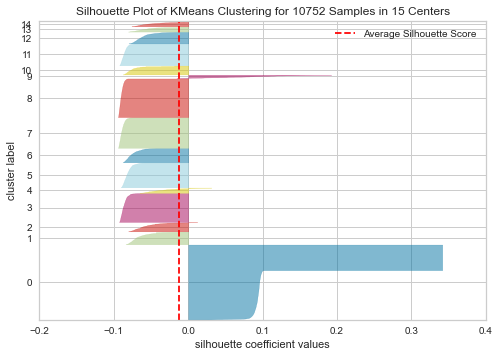

/usr/local/anaconda3/envs/py377/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff040eef850>,
                     colors='yellowbrick', model=None)

In [112]:
from yellowbrick.cluster import silhouette_visualizer
# Use the quick method and immediately show the figure
silhouette_visualizer(km, all_desc_tfidf_matrix, colors='yellowbrick')

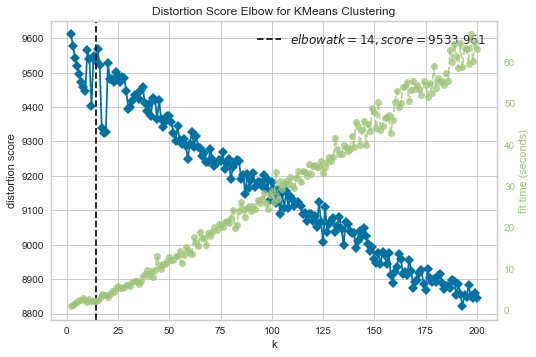

/usr/local/anaconda3/envs/py377/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0b9104e90>,
                 k=None, model=None)

In [120]:
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(km, all_desc_tfidf_matrix, y=None, k=200, metric='distortion', timings=True, locate_elbow=True, show=True)